## Linear Regression 

Obtenido en su mayoría de Joaquín Amat Rodrigo

Más información en: 
- https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- https://www.statisticssolutions.com/assumptions-of-linear-regression/



La regresión lineal es una técnica predictiva que pretende describir la relación lineal entre una o varias variables independientes o predictoras y una variable dependiente.

##### Assumptions:

Para que un modelo de regresión lineal por mínimos cuadrados y sus conclusiones sean válidas, se deben cumplir una serie de supuestos:
- La relación entre la variable dependiente y las independientes debe ser lineal.
- Las variables independientes siguen una distribución normal.
- El conjunto de datos es homocedástico, es decir, estable en varianza.
- No existe (o es muy ligera) multicolinealidad
- No existe (o es muy ligera) autocorrelación

_\*Se recomienda que exista entre 20 y 30 muestras por cada variable independiente_

##### Probando las assumptions.
- **Relación lineal**. La mejor manera de comprobar la linealidad de las variables es representando mediante scatterplots. Ademas, representando los residuos del modelo respecto a las variables en *scatter-plots*. Si la relación es lineal, los residuos se distribuyen de forma aleatoria en torno a cero.

- **Normalidad en la distribución**. La mejor manera de comprobar la normalidad en la distribución es mediante los test estadísticos o los gráficos cuantil cuantil (Q-Q plot).
    - **Shapiro-Wilks**. Al contrario que Kolmogorov-Smirnov, es un test específico de normalidad. Suele ser más potente que KS y se suele usar para muestras < 50, aunque algunos papers lo recomiendan válido para muestras < 2.000.
    - **Kolmogorov-Smirnov**. El test de Kolmogorov-Smirnov es un test más general, no específico de normalidad. Permite comprobar si una muestra procede de una población con una determinada distribución (media y desviación típica), por lo que la media y varianza poblacional debe ser conocida y no estimada. Esto implica que aunque continuamente se alude al test KS como uno válido para contrastar la normalidad, esto no es del todo cierto, ya que exige que la media y la varianza poblacional sean conocidas, cuando no siempre es posible. Esto hace que este test sea poco potente y muy conservador, como se detalla en el siguiente [enlace](https://www.cienciadedatos.net/documentos/8_analisis_normalidad). Para solucionar este problema, se desarrolló una modificación de *KS* conocida como test *Lilliefors*.
    - **Lilliefors**. Es un test desarrollado para solucionar los problemas de KS, asumiendo que la media y la varianza son desconocidas y está especialmente desarrollado para contrastar la normalidad. Es la alternativa a *Shapiro-Wilks* cuando el número de observaciones es mayor a 50.
    - **Jarque-Bera**. Este test tampoco requiere estimaciones de los parámetros que caracterizan la normal. Cuantifica cuánto se desvían los coeficientes de asimetría y curtosis de los esperados en uan distribución normal.
    - **Q-Q plot** o **gráficos cuantil-cuantil**.
    
- **No multicolinealidad**. En los modelos lineales múltiples o con varias variables independientes, los predictores deben ser eso, independientes, y no debe haber colinealidad entre ellos. La colinealidad sucede cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de la colinealidad no se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística. Además, pequeños cambios en los datos, provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinealidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre predictores es 1, cosa que raramente ocurre en la realidad, es frecuente encontrar la llamada casi-colinealidad o multicolinealidad no perfecta. No existe un método estadístico para comprobar la colinealidad, pero si hay ténicas que permite analizar si existe:
    - Si el coeficiente de determinación R2 es alto pero ninguno de los predictores es significativos, hay indicios de colinealidad.
    - Analizando las correlaciones enttre las variables independientes mediante una matriz de correlaciones.
    - Generar un modelo de regresión lineal simple entre cada uno de los predictores frente al resto. Si en alguno de los modelos el *coeficiente de determinación  R2  es alto, estaría señalando a una posible colinealidad.
    - Mediante el Factor de Inflación de la Varianza (VIF):
        - VIF = 1: ausencia total de colinealidad
        - 1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad.
        - 5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.
        - El término de tolerancia es 1VIF, por lo que los límites recomendables están entre 1 y 0.1.

- En caso de encontrar colinealidad entre predictores, hay dos posibles soluciones:
    - Eliminar la variable que, a juicio del data scientist, está influyendo realmente en la variable respuesta. Esta medida no suele tener mucho impacto en R2 debido a la existencia de colinealidad, ya que la información de uno de los predictores es redundante respecto al otro.
    - Combinar las variables colineales en un único predictor, aunque con el riesgo de perder su interpretación.

- **Homocedasticidad**. La varianza de la variable respuesta debe ser constante en todo el rango de los predictores. Para comprobarlo suelen representarse los residuos del modelo frente a cada predictor. Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersión y sin ningún patrón específico. Una distribución cónica es un claro identificador de falta de homocedasticidad. También se puede recurrir a contrastes de homocedasticidad como:
    - **Breusch-Pagan**.
    - **Goldfeld-Quandt**.
    
- **No autocorrelación**. Los valores de cada observación son independientes de los otros. Esto es especialmente importante de comprobar cuando se trabaja con **series temporales**. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patrón hay indicios de autocorrelación (ACF y PACF). También se puede emplear test de hipótesis como:
    - **Durbin-Watson**.
    
###### Buenas prácticas.
Además de todo lo expuesto, se deben detectar valores atípicos o *outliers* que pueden estar influyendo en el modelo. La mejor manera de detectarlos es a través de los residuos. La eliminación de este tipo de observaciones debe de analizarse con detalle y dependiendo de la finalidad del modelo. Si el fin es predictivo, un modelo sin outliers ni observaciones altamente influyentes suele ser capaz de predecir mejor la mayoría de casos. Sin embargo, es muy importante prestar atención a estos valores ya que, de no tratarse de errores de medida, pueden ser los casos más interesantes. El modo adecuado de proceder cuando se sospecha de algún posible valor atípico o influyente es calcular el modelo de regresión incluyendo y excluyendo dicho valor.

## Ejemplo de regresión lineal simple.

Extraído de [Joaquín Amat Rodrigo](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html).

Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

datos.head(5)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


### Representación gráfica

El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

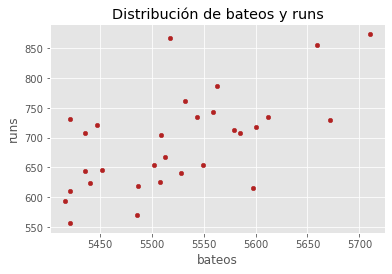

In [3]:
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [4]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206687
P-value:  0.0003388351359791978


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.


### Ajuste del modelo

Se ajusta un modelo empleando como variable respuesta `runs` y como predictor `bateos`. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [5]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 1234, shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: -2367.702841302211
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.35861198994987437


In [7]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = math.sqrt(mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       ))


print("")
print(f"El error (rmse) de test es: {rmse}")

[643.78742093 720.0836677  690.78148597]

El error (rmse) de test es: 59.336716083360486


### Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

- Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

- Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [9]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Se podría hacer también así:

In [16]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X, 
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [17]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [18]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Fri, 22 Jan 2021   Prob (F-statistic):            0.00906
Time:                        18:51:02   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [19]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

,0,1
const,-4579.192050,-156.213633
bateos,0.152244,0.953499


## Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

- `.predict()`: devuelve únicamente el valor de las predicciones.

- `.get_prediction().summary_frame()`: devuelve, además de las predicciones, los intervalos de confianza asociados.

In [20]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
3,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
23,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
14,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
13,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


## Representación gráfica del modelo

Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

In [21]:
X_train[:]

,const,bateos
3,1.0,5672
23,1.0,5452
14,1.0,5513
13,1.0,5612
22,1.0,5421
24,1.0,5436
0,1.0,5659
2,1.0,5563
27,1.0,5486
26,1.0,5441


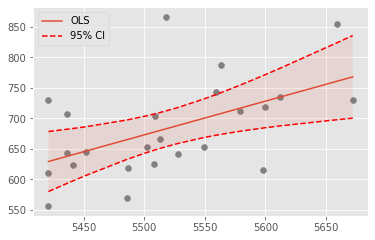

In [22]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train.loc[:, "bateos"]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [23]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = math.sqrt(mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       ))
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608335918


### Interpretación

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( β^0  y  β^1 ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

runs = -2367.7028 + 0.6305 bateos
 
Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.

El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real.

## Ejemplo regresión lineal múltiple

Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.

In [24]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [25]:
# ==============================================================================
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

### Relación entre variables

El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [26]:
datos[datos.columns].corr()

,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


In [27]:
def draw_pearson(dataframe, variables, fig_size = (30,10), annot = True):
        
    """
    Esta función dibuja en un heatmap una matriz de correlaciones con el coeficiente de correlación de Pearson
    
    -------------
    |REQUIREMENTS|
    -------------
    
    Esta función exige que se le introduca una lista
    """
        
    sns.set(style="whitegrid", rc={'figure.figsize':fig_size})
    corr_matrix = dataframe[variables].corr()
    ax = sns.heatmap(corr_matrix, annot = annot)
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    bottom, top = plt.ylim() # discover the values for bottom and top
    bottom += 0.5 # Add 0.5 to the bottom
    top -= 0.5 # Subtract 0.5 from the top
    plt.ylim(bottom, top) # update the ylim(bottom, top) values
    plt.show()

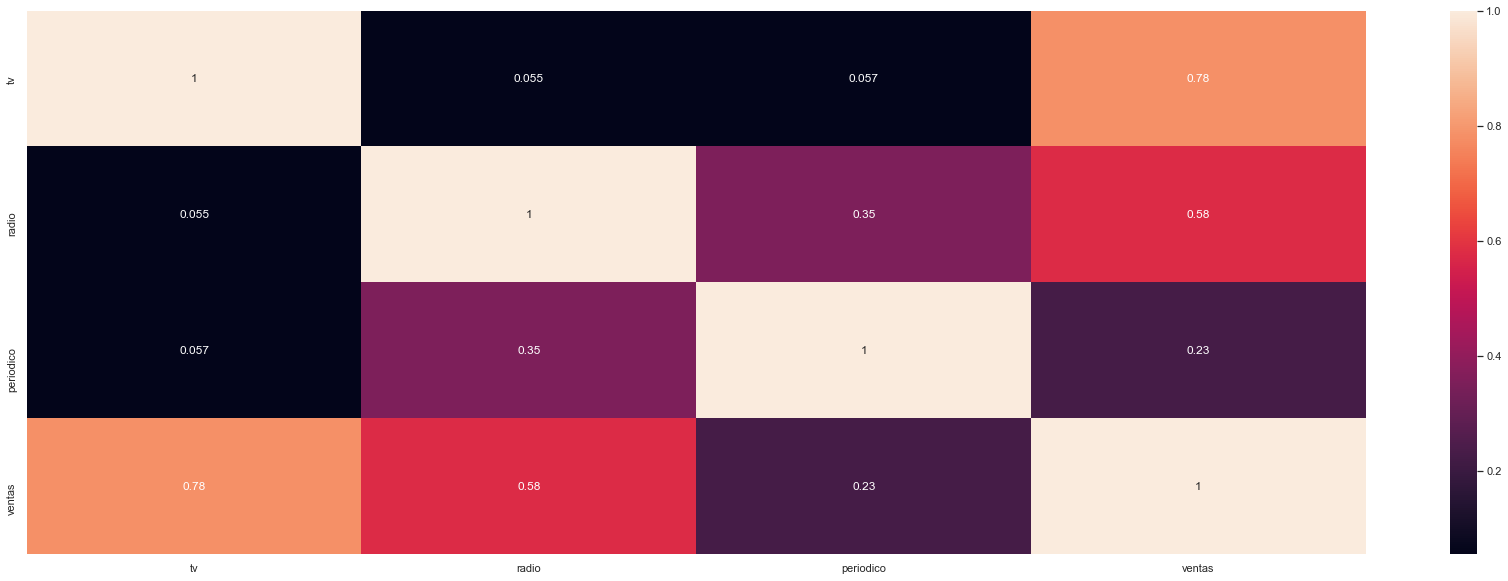

In [28]:
draw_pearson(datos, datos.columns)

AttributeError: module 'seaborn' has no attribute 'histplot'

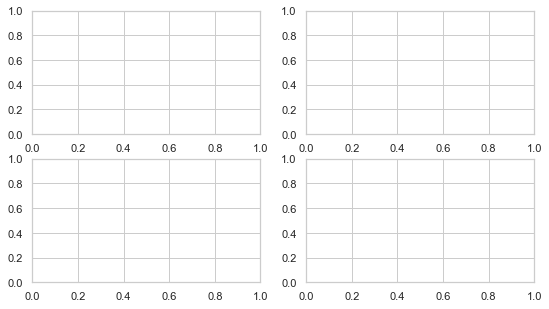

In [29]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Ajuste del modelo

In [30]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=['tv', 'radio', 'periodico', 'ventas']
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [32]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.01e-75
Time:                        18:54:19   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8497      0.365      7.803      0.0

El modelo con todas las variables introducidas como predictores tiene un  R2  alto (0.894), es capaz de explicar el 89.4% de la variabilidad observada en las ventas. El p-value del modelo es significativo (1.01e-75) por lo que se puede aceptar que el modelo es mejor que lo esperado es por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.

Acorde al p-value obtenido para el coeficiente parcial de regresión de periodico (0.723), esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor periodico.

In [33]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'periodico')
X_test  = X_test.drop(columns = 'periodico')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           3.69e-77
Time:                        18:54:19   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

### Intervalos de confianza de los coeficientes del modelo

In [34]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2.238211,3.562549
tv,0.042439,0.048701
radio,0.172853,0.207942


## Diagnóstico de los residuos e inspección visual

In [35]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

In [36]:
import seaborn as sns

AttributeError: module 'seaborn' has no attribute 'histplot'

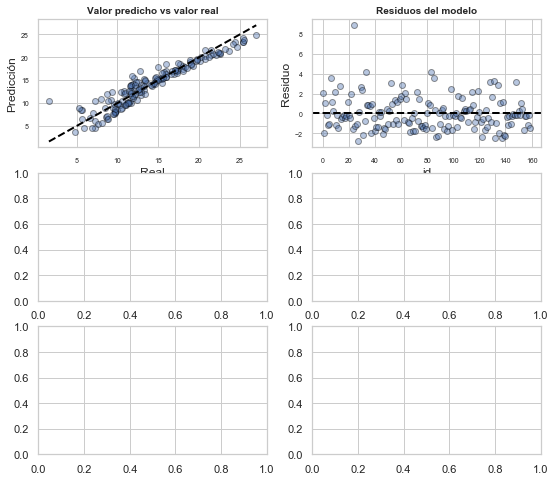

In [37]:
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

### Test de normalidad


Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [38]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9165118932723999, 5.86075366015848e-08)

In [39]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 54.901056530390804, p-value = 1.1978075580040035e-12


Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).

### Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [40]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
146,15.231643,0.248325,14.741154,15.722132,11.880621,18.582665
32,7.615382,0.247198,7.127119,8.103645,4.264685,10.966079
43,13.928155,0.213535,13.506384,14.349927,10.586500,17.269810
99,17.001020,0.210052,16.586127,17.415913,13.660226,20.341814


In [41]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = math.sqrt(mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       ))
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.695620750010119


### Interpretación

El modelo de regresión lineal múltiple:

ventas = 2.9004 + 0.0456tv + 0.1904radio
 
es capaz de explicar el 89.4% de la varianza observada en las ventas (R-squared: 0.894, Adj. R-squared: 0.892). El test  F  es significativo (p-value: 3.69e-77). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 1.696. Las predicciones del modelo final se alejan en promedio 1.696 unidades del valor real.

### Interacción entre predictores

El modelo lineal a partir del cual se han obtenido las conclusiones asume que el efecto sobre las ventas debido a un incremento en el presupuesto de uno de los medios de comunicación es independiente del presupuesto gastado en los otros. Por ejemplo, el modelo lineal considera que el efecto promedio sobre las ventas debido a aumentar en una unidad el presupuesto de anuncios en TV es siempre de 0.0456, independientemente de la cantidad invertida en anuncios por radio. Sin embargo, esto no tiene por qué ser necesariamente así, puede existir interacción entre los predictores de forma que, el efecto de cada uno de ellos sobre la variable respuesta, depende en cierta medida del valor que tome el otro predictor.

Tal y como se ha definido previamente, un modelo lineal con dos predictores sigue la ecuación:

y=β0+β1x1+β2x2+ϵ
 
Acorde a esta definición, el incremento de una unidad en el predictor  x1  produce un incremento promedio de la variable y de  β1 . Modificaciones en el predictor  x2  no alteran este hecho, y lo mismo ocurre con  x2  respecto a  x1 . Para que el modelo pueda contemplar la interacción entre ambos, se introduce un tercer predictor, llamado interaction term, que se construye con el producto de los predictores  x1  y  x2 .

y=β0+β1x1+β2x2+β3x1x2+e
 
La reorganización de los términos resulta en:

y=β0+(β1+β3x2)x1+β2x2+e
 
El efecto de  x1  sobre  y  ya no es constante, sino que depende del valor que tome  x2 .

En los modelos de regresión lineal múltiple que incorporan interacciones entre predictores hay que tener en cuenta el hierarchical principle, según el cual, si se incorpora al modelo una interacción entre predictores, se deben incluir siempre los predictores individuales que participan en la interacción, independientemente de que su p-value sea significativo o no.

En stastmodels se puede introducir interacción entre predictores de dos formas:

- Indicandolo en la fórmula con el término *: ventas ~ tv * radio

- Añadiendo una nueva columna con la multiplicación de los predictores cuya interacción se quiere incluir en el modelo.

In [43]:
# División de los datos en train y test
# ==============================================================================
X = datos[['tv', 'radio']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [44]:
# Creación del modelo con interacciones utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=['tv', 'radio', 'ventas']
#               )
# modelo_interacion = smf.ols(formula = 'ventas ~ tv*radio', data = datos_train)
# modelo_interacion = modelo_interacion.fit()
# print(modelo_interacion.summary())

In [45]:
# Creación del modelo con interacciones utilizando matrices
# ==============================================================================
# Se añade una nueva columna con la interacción
X_train['tv_radio'] = X_train['tv'] * X_train['radio']
X_test['tv_radio']  = X_test['tv'] * X_test['radio']

# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo_interacion  = sm.OLS(endog=y_train, exog=X_train,)
modelo_interacion  = modelo_interacion.fit()
print(modelo_interacion.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1562.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          4.28e-116
Time:                        19:11:27   Log-Likelihood:                -212.91
No. Observations:                 160   AIC:                             433.8
Df Residuals:                     156   BIC:                             446.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9035      0.281     24.558      0.0

Los resultados muestran una evidencia clara de que la interacción tv radio es significativa (p-value* muy próximo a 0).

El modelo que incorpora la interacción tiene un Adjusted R-squared de 0.967, un valor superior al 0.892 del modelo que solo contemplaba el efecto de los predictores por separado. Ahora bien, ¿Es suficiente esta diferencia para afirmar que el modelo con interacción es superior? Una forma de responder a esta pregunta es recurriendo al F-test (ANOVA).

## Comparación de modelos mediante test F-test (ANOVA)

Supóngase un modelo  M  y otro modelo  m , de menor tamaño, formado por un subconjunto de los predictores contenidos en  M . Si la diferencia en el ajuste es muy pequeña, acorde al principio de parsimonia, el modelo  m  es más adecuado. Es posible contrastar si la diferencia en ajuste es significativa mediante la comparación de los residuos. En concreto el estadístico empleado es:

RSSm−RSSM/RSSM
 
Para evitar que el tamaño del modelo influya en el contraste, se divide la suma de residuos cuadrados RSS de cada modelo entre sus grados de libertad. El estadístico resultante sigue una distribución  F .

(RSSm−RSSM)/(dfm−dfM)RSSM/(dfM)∼Fdfm−dfM, dfM
 
donde  df  son los grados de libertad del modelo, que equivalen al número de observaciones menos el número de predictores.

En los apartados anteriores, se entrenó un modelo que incluía interacciones y otro que no. Se procede a realizar un test de hipótesis que evalúe la hipótesis nula de que ambos modelos se ajustan a los datos igual de bien. Es decir, que permita determinar si un modelo es mejor que el otro prediciendo la variable respuesta. Esto puede hacerse con la función anova_lm() de statsmodels.stats.anova.


In [46]:
anova_lm(modelo, modelo_interacion)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,157.0,442.212726,0.0,NaN,NaN,NaN
1,156.0,134.116584,1.0,308.096142,358.3673,2.926598e-42


El test ANOVA encuentra evidencias claras (p-value prácticamente de cero) de que el modelo que incluye la interacción entre predictores es capaz de modelar mejor la variable respuesta.

Esta forma de comparar modelos está muy arraigada en la comunidad estadística. En la comunidad de machine learning es mucho más común comparar modelos con técnicas de validación como la [validación cruzada](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html#Validaci%C3%B3n)

In [48]:
import os

os.getcwd()

'C:\\Users\\jmoreno7'